# Chapter 9: Tabular Modeling Deep Dive

Data in tables, spreadsheets, csvs.

Goal: Predict the value of one column based on the other columns.

Also, random forests, preprocessing, cleaning, interpreting results.

## Vocab

**Continuous** variables: height, income, temperature.

**Categorical** variables: movie id, state, 

**One-hot encoding**

Simple, but inefficient and high dimension:
```
A: [1, 0, 0]
B: [0, 1, 0]
C: [0, 0, 1]
```

**Entity Embedding** 

Trained, lower dimension.
```
    Apple: [0.9, -0.1]
    Banana: [0.1, 0.8]
    Grape: [-0.7, 0.6]
```

## Two key techniques:

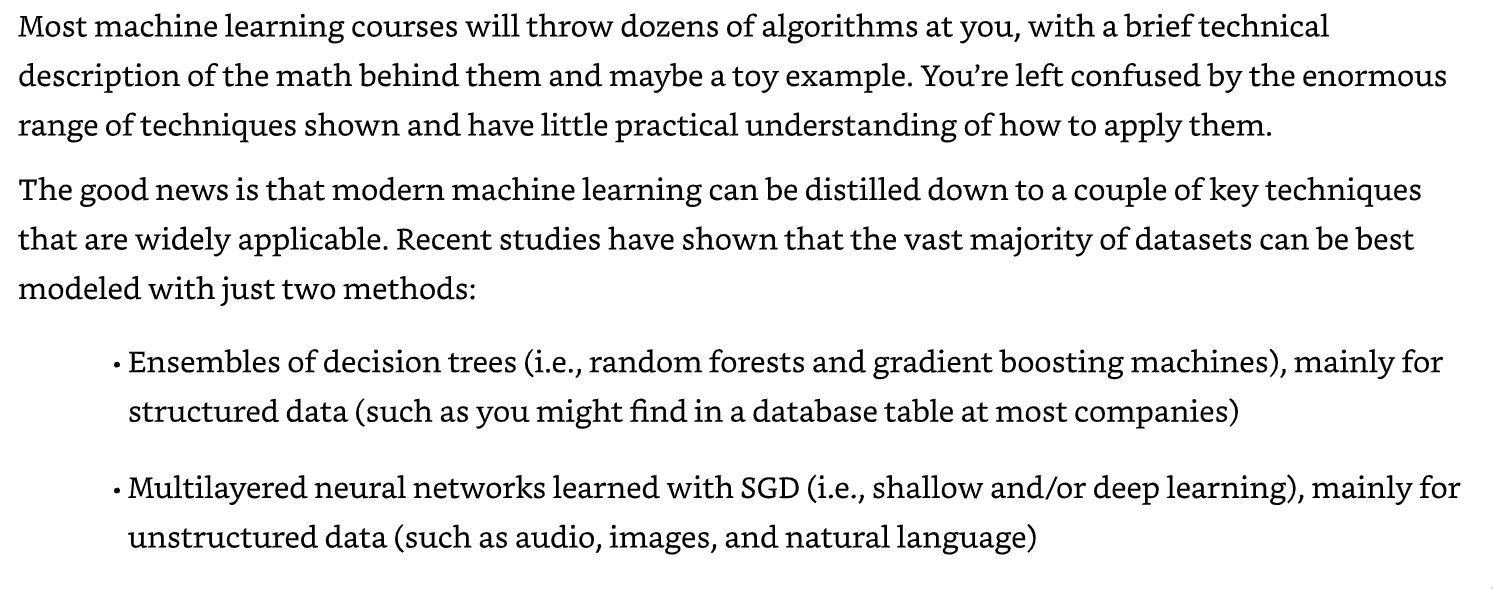

Paper on entity embeddings, structured data, decision trees, and random forests: https://arxiv.org/abs/1604.06737

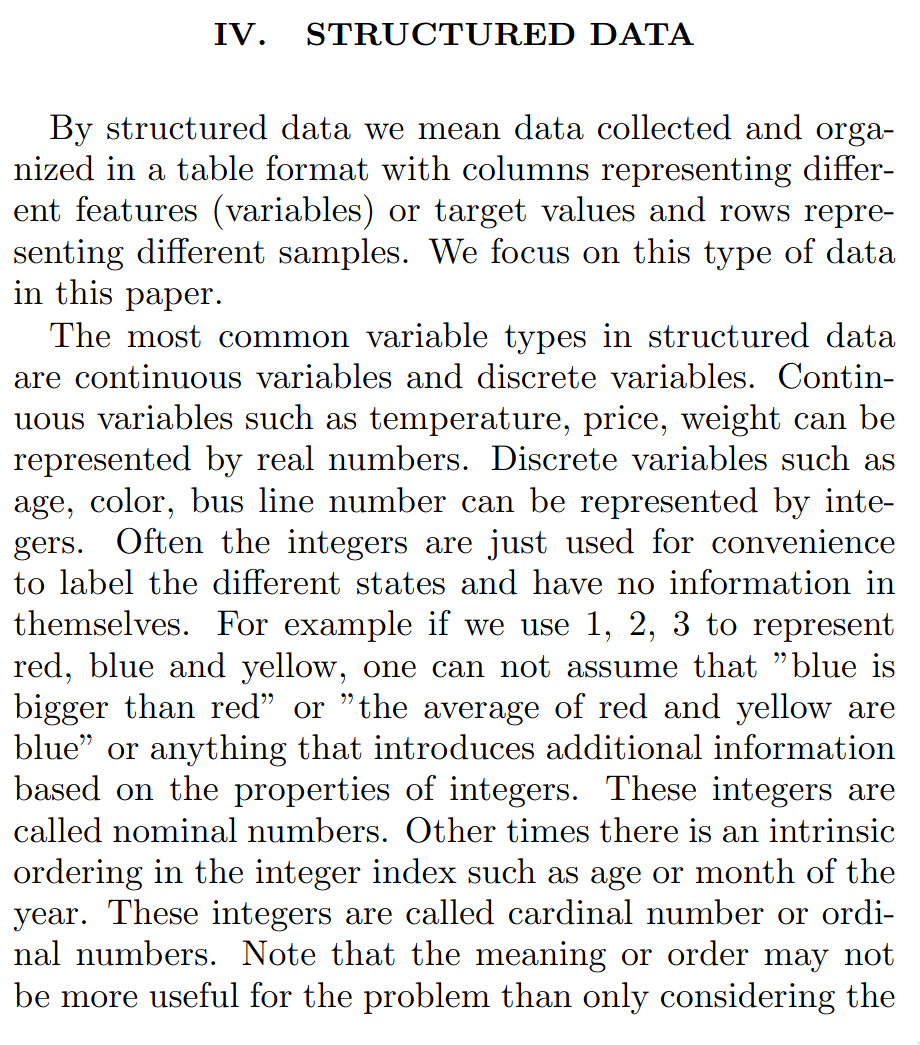



Let's consider how we find the right questions to ask. Of course, we wouldn't want to have to create all these questions ourselves—that's what computers are for! The basic steps to train a decision tree can be written down very easily:

1. Loop through each column of the dataset in turn.
1. For each column, loop through each possible level of that column in turn.
1. Try splitting the data into two groups, based on whether they are greater than or less than that value (or if it is a categorical variable, based on whether they are equal to or not equal to that level of that categorical variable).
1. Find the average sale price for each of those two groups, and see how close that is to the actual sale price of each of the items of equipment in that group. That is, treat this as a very simple "model" where our predictions are simply the average sale price of the item's group.
1. After looping through all of the columns and all the possible levels for each, pick the split point that gave the best predictions using that simple model.
1. We now have two different groups for our data, based on this selected split. Treat each of these as separate datasets, and find the best split for each by going back to step 1 for each group.
1. Continue this process recursively, until you have reached some stopping criterion for each group—for instance, stop splitting a group further when it has only 20 items in it.

Although this is an easy enough algorithm to implement yourself (and it is a good exercise to do so), we can save some time by using the implementation built into sklearn.


In [ ]:
# This is pseudocode because I don't know python / pandas well enough just yet.
# By the end of this module, I should be able to turn this into real code and put it to the test.

def split(dataset):
    scores_for_splits = [];
    
    for col in dataset.columns:
        for level in col.levels:
            (left, right) = dataset.split( lambda x : x.level >= level )
            loss_left = loss(left.mean(), left["sale price"]) # Compare mean price to actual price
            loss_right = loss(right.mean(), right["sale price"]) # Compare mean price to actual price
            split = (col, level)
            split_score = score(loss_left, loss_right)
            scores_for_splits.push((split, split_score, left, right))
    
    return find_best(scores_for_splits);

def split_recursive(dataset):
    if len(dataset) < 20:
        return [(None, None, dataset)] # No split, No score
    
    (best_split, best_score, left, right) = split(dataset);
    return [(best_split, best_score, None)] ++ split_recursive(left) ++ split_recursive(right)
    

I asked ChatGPT to convert the psuedocode above with real working python code.
I have not tested it, but do feel encouraged that I am not missing or misunderstanding the basic ideas.
That conversation is here: https://chat.openai.com/share/96fedae8-c9a8-4b66-abea-d95739ef376a

This video (and its subsequent/related videos) was also helpful in understanding the algorithm: https://www.youtube.com/watch?v=ZVR2Way4nwQ